In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv


In [47]:
import pandas as pd
opoid = pd.read_csv("/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv")

21:33:15 - cmdstanpy - INFO - Chain [1] start processing
21:33:15 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:33:15 - cmdstanpy - INFO - Chain [1] start processing
21:33:15 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



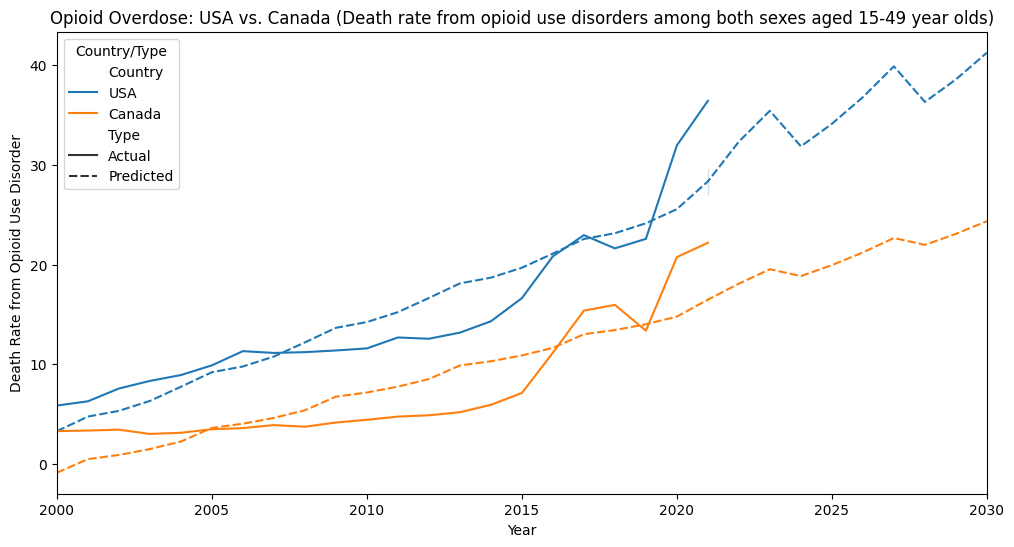

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds'
] # Limiting to one age group for clarity

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000] # Filter for Prophet
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for the selected age group
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    # Prepare data for plotting (actual data)
    usa_actual = pd.DataFrame({
        'Year': df_usa[df_usa['Year'] >= 2000]['Year'],
        'Death Rate': df_usa[df_usa['Year'] >= 2000][age_group],
        'Country': 'USA',
        'Type': 'Actual'
    })
    canada_actual = pd.DataFrame({
        'Year': df_canada[df_canada['Year'] >= 2000]['Year'],
        'Death Rate': df_canada[df_canada['Year'] >= 2000][age_group],
        'Country': 'Canada',
        'Type': 'Actual'
    })

    # Prepare data for plotting (predicted data)
    usa_predicted = pd.DataFrame({
        'Year': forecast_usa['ds'].dt.year,
        'Death Rate': forecast_usa['yhat'],
        'Country': 'USA',
        'Type': 'Predicted'
    })
    canada_predicted = pd.DataFrame({
        'Year': forecast_canada['ds'].dt.year,
        'Death Rate': forecast_canada['yhat'],
        'Country': 'Canada',
        'Type': 'Predicted'
    })

    # Combine actual and predicted data
    combined_data = pd.concat([usa_actual, canada_actual, usa_predicted, canada_predicted])

    # Plotting with Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Death Rate', hue='Country', style='Type', data=combined_data)

    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose: USA vs. Canada ({age_group})")
    plt.xlim(2000, combined_data['Year'].max())
    plt.legend(title='Country/Type')

    # Save plot as .jpg
    plt.savefig(f"opioid_combined_{age_group.replace('/', '_').replace(' ', '_')}_2000.jpg", dpi=300)
    plt.show()

21:36:00 - cmdstanpy - INFO - Chain [1] start processing
21:36:01 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:36:01 - cmdstanpy - INFO - Chain [1] start processing
21:36:01 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



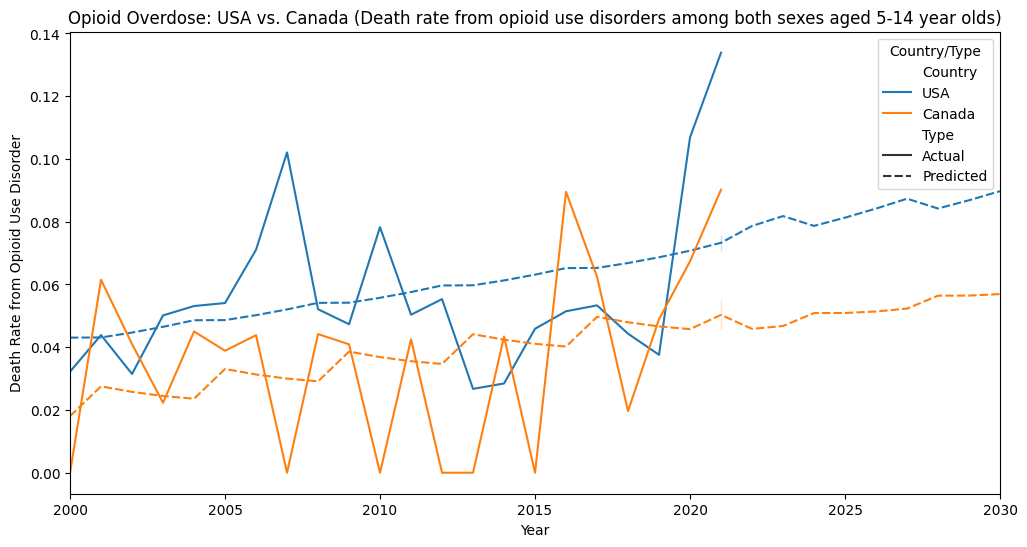

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds'
] # Limiting to one age group for clarity

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000] # Filter for Prophet
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for the selected age group
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    # Prepare data for plotting (actual data)
    usa_actual = pd.DataFrame({
        'Year': df_usa[df_usa['Year'] >= 2000]['Year'],
        'Death Rate': df_usa[df_usa['Year'] >= 2000][age_group],
        'Country': 'USA',
        'Type': 'Actual'
    })
    canada_actual = pd.DataFrame({
        'Year': df_canada[df_canada['Year'] >= 2000]['Year'],
        'Death Rate': df_canada[df_canada['Year'] >= 2000][age_group],
        'Country': 'Canada',
        'Type': 'Actual'
    })

    # Prepare data for plotting (predicted data)
    usa_predicted = pd.DataFrame({
        'Year': forecast_usa['ds'].dt.year,
        'Death Rate': forecast_usa['yhat'],
        'Country': 'USA',
        'Type': 'Predicted'
    })
    canada_predicted = pd.DataFrame({
        'Year': forecast_canada['ds'].dt.year,
        'Death Rate': forecast_canada['yhat'],
        'Country': 'Canada',
        'Type': 'Predicted'
    })

    # Combine actual and predicted data
    combined_data = pd.concat([usa_actual, canada_actual, usa_predicted, canada_predicted])

    # Plotting with Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Death Rate', hue='Country', style='Type', data=combined_data)

    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose: USA vs. Canada ({age_group})")
    plt.xlim(2000, combined_data['Year'].max())
    plt.legend(title='Country/Type')

    # Save plot as .jpg
    plt.savefig(f"opioid_combined_{age_group.replace('/', '_').replace(' ', '_')}_2000.jpg", dpi=300)
    plt.show()

21:36:52 - cmdstanpy - INFO - Chain [1] start processing
21:36:53 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:36:53 - cmdstanpy - INFO - Chain [1] start processing
21:36:53 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



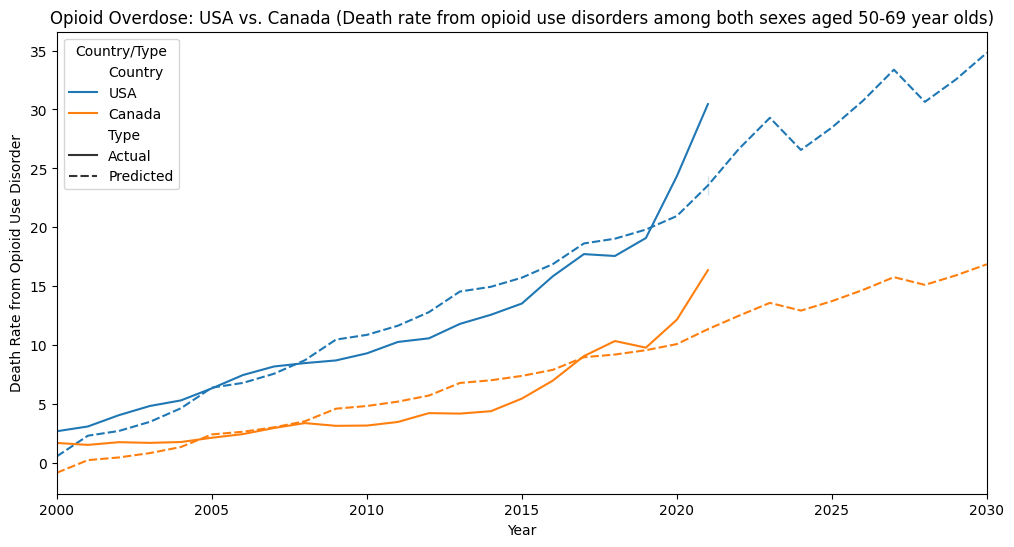

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds'
] # Limiting to one age group for clarity

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000] # Filter for Prophet
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for the selected age group
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    # Prepare data for plotting (actual data)
    usa_actual = pd.DataFrame({
        'Year': df_usa[df_usa['Year'] >= 2000]['Year'],
        'Death Rate': df_usa[df_usa['Year'] >= 2000][age_group],
        'Country': 'USA',
        'Type': 'Actual'
    })
    canada_actual = pd.DataFrame({
        'Year': df_canada[df_canada['Year'] >= 2000]['Year'],
        'Death Rate': df_canada[df_canada['Year'] >= 2000][age_group],
        'Country': 'Canada',
        'Type': 'Actual'
    })

    # Prepare data for plotting (predicted data)
    usa_predicted = pd.DataFrame({
        'Year': forecast_usa['ds'].dt.year,
        'Death Rate': forecast_usa['yhat'],
        'Country': 'USA',
        'Type': 'Predicted'
    })
    canada_predicted = pd.DataFrame({
        'Year': forecast_canada['ds'].dt.year,
        'Death Rate': forecast_canada['yhat'],
        'Country': 'Canada',
        'Type': 'Predicted'
    })

    # Combine actual and predicted data
    combined_data = pd.concat([usa_actual, canada_actual, usa_predicted, canada_predicted])

    # Plotting with Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Death Rate', hue='Country', style='Type', data=combined_data)

    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose: USA vs. Canada ({age_group})")
    plt.xlim(2000, combined_data['Year'].max())
    plt.legend(title='Country/Type')

    # Save plot as .jpg
    plt.savefig(f"opioid_combined_{age_group.replace('/', '_').replace(' ', '_')}_2000.jpg", dpi=300)
    plt.show()

21:37:48 - cmdstanpy - INFO - Chain [1] start processing
21:37:48 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:37:48 - cmdstanpy - INFO - Chain [1] start processing
21:37:48 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



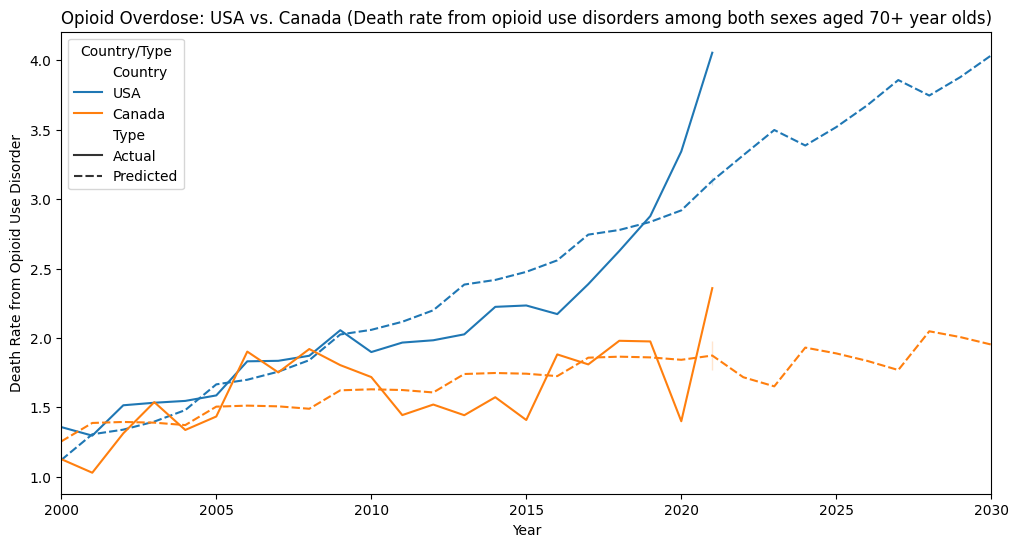

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 70+ year olds'
] # Limiting to one age group for clarity

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000] # Filter for Prophet
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for the selected age group
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    # Prepare data for plotting (actual data)
    usa_actual = pd.DataFrame({
        'Year': df_usa[df_usa['Year'] >= 2000]['Year'],
        'Death Rate': df_usa[df_usa['Year'] >= 2000][age_group],
        'Country': 'USA',
        'Type': 'Actual'
    })
    canada_actual = pd.DataFrame({
        'Year': df_canada[df_canada['Year'] >= 2000]['Year'],
        'Death Rate': df_canada[df_canada['Year'] >= 2000][age_group],
        'Country': 'Canada',
        'Type': 'Actual'
    })

    # Prepare data for plotting (predicted data)
    usa_predicted = pd.DataFrame({
        'Year': forecast_usa['ds'].dt.year,
        'Death Rate': forecast_usa['yhat'],
        'Country': 'USA',
        'Type': 'Predicted'
    })
    canada_predicted = pd.DataFrame({
        'Year': forecast_canada['ds'].dt.year,
        'Death Rate': forecast_canada['yhat'],
        'Country': 'Canada',
        'Type': 'Predicted'
    })

    # Combine actual and predicted data
    combined_data = pd.concat([usa_actual, canada_actual, usa_predicted, canada_predicted])

    # Plotting with Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Death Rate', hue='Country', style='Type', data=combined_data)

    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose: USA vs. Canada ({age_group})")
    plt.xlim(2000, combined_data['Year'].max())
    plt.legend(title='Country/Type')

    # Save plot as .jpg
    plt.savefig(f"opioid_combined_{age_group.replace('/', '_').replace(' ', '_')}_2000.jpg", dpi=300)
    plt.show()

21:38:28 - cmdstanpy - INFO - Chain [1] start processing
21:38:28 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:38:28 - cmdstanpy - INFO - Chain [1] start processing
21:38:28 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



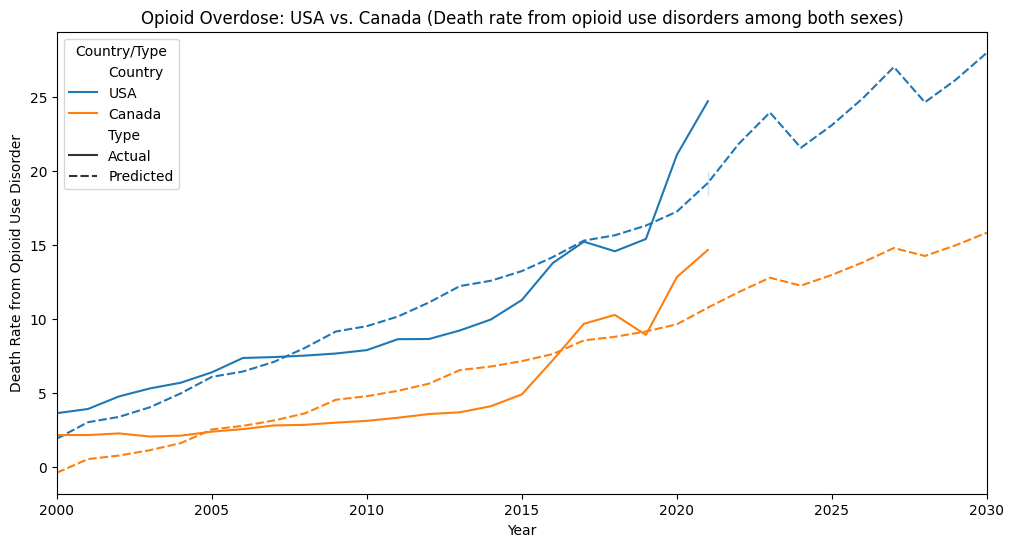

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes'
] # Limiting to one age group for clarity

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000] # Filter for Prophet
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for the selected age group
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    # Prepare data for plotting (actual data)
    usa_actual = pd.DataFrame({
        'Year': df_usa[df_usa['Year'] >= 2000]['Year'],
        'Death Rate': df_usa[df_usa['Year'] >= 2000][age_group],
        'Country': 'USA',
        'Type': 'Actual'
    })
    canada_actual = pd.DataFrame({
        'Year': df_canada[df_canada['Year'] >= 2000]['Year'],
        'Death Rate': df_canada[df_canada['Year'] >= 2000][age_group],
        'Country': 'Canada',
        'Type': 'Actual'
    })

    # Prepare data for plotting (predicted data)
    usa_predicted = pd.DataFrame({
        'Year': forecast_usa['ds'].dt.year,
        'Death Rate': forecast_usa['yhat'],
        'Country': 'USA',
        'Type': 'Predicted'
    })
    canada_predicted = pd.DataFrame({
        'Year': forecast_canada['ds'].dt.year,
        'Death Rate': forecast_canada['yhat'],
        'Country': 'Canada',
        'Type': 'Predicted'
    })

    # Combine actual and predicted data
    combined_data = pd.concat([usa_actual, canada_actual, usa_predicted, canada_predicted])

    # Plotting with Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Death Rate', hue='Country', style='Type', data=combined_data)

    # Adding labels and title
    plt.xlabel("Year")
    plt.ylabel("Death Rate from Opioid Use Disorder")
    plt.title(f"Opioid Overdose: USA vs. Canada ({age_group})")
    plt.xlim(2000, combined_data['Year'].max())
    plt.legend(title='Country/Type')

    # Save plot as .jpg
    plt.savefig(f"opioid_combined_{age_group.replace('/', '_').replace(' ', '_')}_2000.jpg", dpi=300)
    plt.show()

In [70]:
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet

# Load the dataset
df = pd.read_csv('/kaggle/input/opoid-overdosage-death-rates-by-age/death-rates-opioid-overdoses-by-age.csv')

# List of age groups
age_groups = [
    'Death rate from opioid use disorders among both sexes aged 0-4 year olds',
    'Death rate from opioid use disorders among both sexes aged 5-14 year olds',
    'Death rate from opioid use disorders among both sexes aged 15-49 year olds',
    'Death rate from opioid use disorders among both sexes aged 50-69 year olds',
    'Death rate from opioid use disorders among both sexes aged 70+ year olds',
    'Death rate from opioid use disorders among both sexes'
]

# Filter dataset for USA and Canada
df_usa = df[df['Entity'] == 'United States']
df_canada = df[df['Entity'] == 'Canada']

# Function to forecast each age group's death rate using Prophet
def prophet_forecast(df, age_group):
    df_filtered = df[['Year', age_group]].copy()
    df_filtered.columns = ['ds', 'y']
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'], format='%Y')
    df_filtered = df_filtered[df_filtered['ds'].dt.year >= 2000]
    model = Prophet()
    model.fit(df_filtered)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)
    return forecast

# Plot USA vs. Canada for each age group and save as HTML
for age_group in age_groups:
    forecast_usa = prophet_forecast(df_usa, age_group)
    forecast_canada = prophet_forecast(df_canada, age_group)

    fig = go.Figure()

    # Add actual data (USA)
    fig.add_trace(go.Scatter(
        x=df_usa[df_usa['Year'] >= 2000]['Year'],
        y=df_usa[df_usa['Year'] >= 2000][age_group],
        mode='lines+markers',
        name='USA (Actual)',
        line=dict(color='blue')
    ))

    # Add actual data (Canada)
    fig.add_trace(go.Scatter(
        x=df_canada[df_canada['Year'] >= 2000]['Year'],
        y=df_canada[df_canada['Year'] >= 2000][age_group],
        mode='lines+markers',
        name='Canada (Actual)',
        line=dict(color='red')
    ))

    # Add predicted data (USA)
    fig.add_trace(go.Scatter(
        x=forecast_usa['ds'].dt.year,
        y=forecast_usa['yhat'],
        mode='lines+markers',
        name='USA (Forecast)',
        line=dict(color='blue', dash='dash')
    ))

    # Add predicted data (Canada)
    fig.add_trace(go.Scatter(
        x=forecast_canada['ds'].dt.year,
        y=forecast_canada['yhat'],
        mode='lines+markers',
        name='Canada (Forecast)',
        line=dict(color='red', dash='dash')
    ))

    # Update layout
    fig.update_layout(
        title=f"Opioid Overdose Forecast: USA vs. Canada ({age_group})",
        xaxis_title="Year",
        yaxis_title="Death Rate from Opioid Use Disorder",
        xaxis=dict(range=[2000, forecast_usa['ds'].dt.year.max()])
    )

    # Save as HTML
    fig.write_html(f"opioid_plotly_{age_group.replace('/', '_').replace(' ', '_')}_2000.html")
    fig.show()

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:46 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:46 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:46 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:46 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:46 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:41:46 - cmdstanpy - INFO - Chain [1] start processing
21:41:47 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



21:41:47 - cmdstanpy - INFO - Chain [1] start processing
21:41:47 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:41:47 - cmdstanpy - INFO - Chain [1] start processing
21:41:47 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



21:41:47 - cmdstanpy - INFO - Chain [1] start processing
21:41:47 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

21:41:47 - cmdstanpy - INFO - Chain [1] start processing
21:41:47 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

